In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset=pd.read_csv("/content/heart_diagnosis.csv")

#The dataset contained '?' in some rows of two columns,
#so I had to remove all those rows.

dataset.drop(data[data['ca']=='?'].index,inplace=True)
dataset.drop(data[data["thal"]=='?'].index,inplace=True)
# data

In [ ]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:13].values
y = dataset.iloc[:,13:14].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# # Neural network
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
# model.add(Dense(12, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
# model = Sequential()
# model.add(Dense(16, input_dim=13, activation='relu'))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 1s 58ms/step - loss: 1.8478 - accuracy: 0.1362 - val_loss: 1.8250 - val_accuracy: 0.1667
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 1.7906 - accuracy: 0.1498 - val_loss: 1.7729 - val_accuracy: 0.1667
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 1.7560 - accuracy: 0.1524 - val_loss: 1.7243 - val_accuracy: 0.1667
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 1.7196 - accuracy: 0.1600 - val_loss: 1.6821 - val_accuracy: 0.1667
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 1.6658 - accuracy: 0.1631 - val_loss: 1.6444 - val_accuracy: 0.2000
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 1.6386 - accuracy: 0.1917 - val_loss: 1.6110 - val_accuracy: 0.2000
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 1.6283 - accuracy: 0.2095 - val_loss: 1.5806 - val_accuracy: 0.2333
Epoch 8/100
5/5 [===

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 70.0


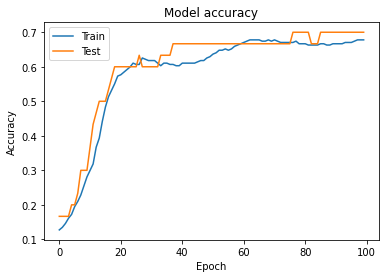

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

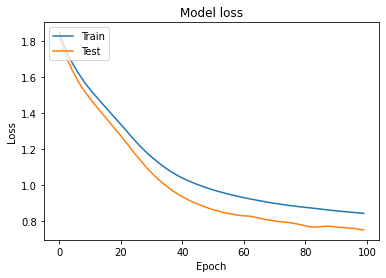

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [ ]:
# y_pred = model.predict(X_test)
# #Converting predictions to label
# pred = list()
# for i in range(len(y_pred)):
#     pred.append(np.argmax(y_pred[i]))
# #Converting one hot encoded test label to label
# test = list()
# for i in range(len(y_test)):
#     test.append(np.argmax(y_test[i]))

In [ ]:
# from sklearn.metrics import accuracy_score
# a = accuracy_score(pred,test)
# print('Accuracy is:', a*100)